## Importing Libraries 

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

## Importing Dataset

## Visualising the Data

In [2]:
from zipfile import ZipFile

data_path = 'dog-vs-cat.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')
    

The data set has been extracted.


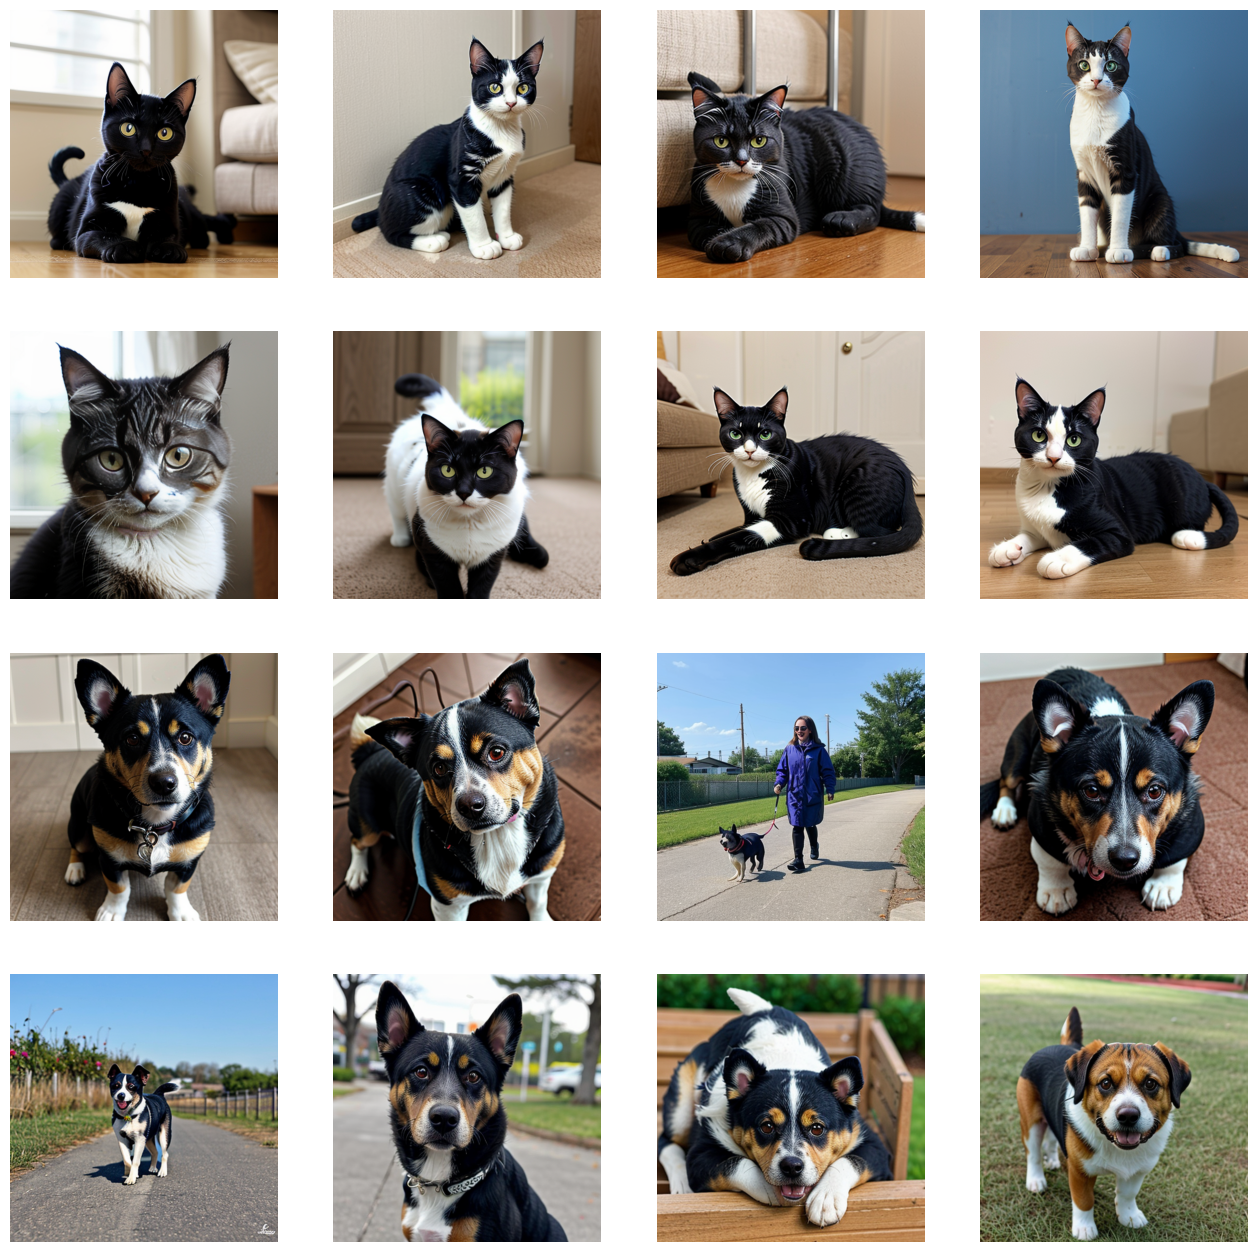

In [3]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('animals/cat')
dog_dir = os.path.join('animals/dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## Splitting the Dataset

In [4]:
base_dir = 'animals'

train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 1000 files belonging to 2 classes.
Using 900 files for training.
Found 1000 files belonging to 2 classes.
Using 100 files for validation.


## Model Architecture

In [5]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

## Model Compilation and Training

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
29/29 [==============================] - 35s 1s/step - loss: 0.5639 - accuracy: 0.7533 - val_loss: 8.9856 - val_accuracy: 0.5300
Epoch 2/10
29/29 [==============================] - 26s 869ms/step - loss: 0.2983 - accuracy: 0.8833 - val_loss: 5.9192 - val_accuracy: 0.4700
Epoch 3/10
29/29 [==============================] - 26s 867ms/step - loss: 0.2319 - accuracy: 0.9211 - val_loss: 0.5624 - val_accuracy: 0.8300
Epoch 4/10
29/29 [==============================] - 26s 891ms/step - loss: 0.1557 - accuracy: 0.9489 - val_loss: 4.2115 - val_accuracy: 0.5500
Epoch 5/10
29/29 [==============================] - 26s 873ms/step - loss: 0.1159 - accuracy: 0.9644 - val_loss: 1.8400 - val_accuracy: 0.5800
Epoch 6/10
29/29 [==============================] - 26s 880ms/step - loss: 0.1475 - accuracy: 0.9467 - val_loss: 7.4623 - val_accuracy: 0.5300
Epoch 7/10
29/29 [==============================] - 26s 872ms/step - loss: 0.1064 - accuracy: 0.9611 - val_loss: 0.0945 - val_accuracy: 0.9500
Ep

## Model Evaluation

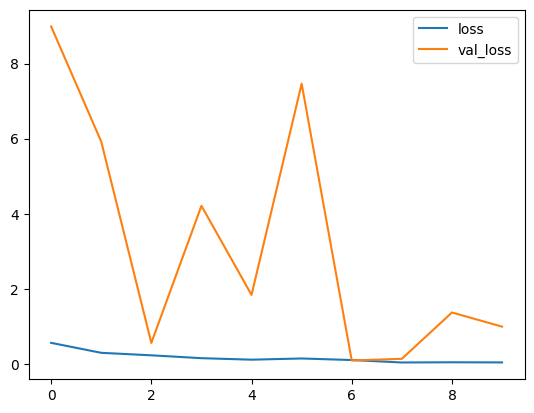

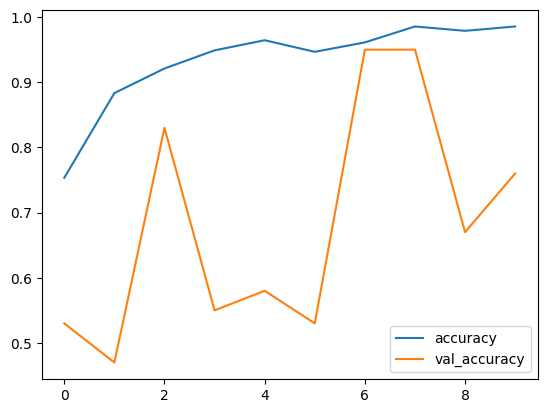

In [8]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

The model shows healthy learning behavior
No major signs of overfitting (validation metrics track well with training)
Good convergence achieved within 10 epochs
The model appears to be well-balanced for the cat vs dog classification task
The graphs indicate that the model has been trained successfully and should perform well on new, unseen images.

1/1 [==============================] - 0s 32ms/step
Cat
1/1 [==============================] - 0s 37ms/step
Dog


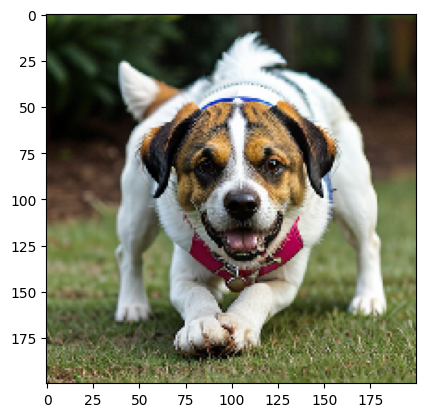

In [13]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(200, 200))
    plt.imshow(img)
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")
    
predict_image('animals/cat/00000-4122619873.png')
predict_image('animals/dog/00501-3846168663.png')